<a href="https://colab.research.google.com/github/vvkisil/MoebInv-notebooks/blob/master/Geometry_of_cycles/Start_from_Basics/What_is_cycle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Start from the basics: What is a cycle, by the way?
### [Vladimir V Kisil](http://www1.maths.leeds.ac.uk/~kisilv/)

Cycles are fundamental objects in considered geometries and, consequently, in `MoebInv` package. Thus they deserve a proper introduction. 

<a id="ToC"></a>
#### Table of contents of this notebook

+ [Unifying circles, points and lines](#unifying)
+ [The projective space of cycles](#projective)
+ [Visualising cycles](#visualising)
  - [Using viewports](#vieports)
+ [Cycles: circles, parabolas and hyperbolas](#ell-par-hyp)
+ [Appendix: `MoebInv` proof of the Theorem](#appendix)
+ [References](#references)

Back to the [top-level Table of Contents](https://github.com/vvkisil/MoebInv-notebooks/blob/master/Table_of_contents.md).

<a id="unifying"></a>
## Unifying circles, points and lines

Let us start from a circle with centre $(u_0,v_0)$ and radius $r$ which is represented by an equation:
\begin{equation}
    (u-u_0)^2 + (v-v_0)^2 = r^2. \tag{1}\label{eq1}
\end{equation}
Naturally, points can be seen as limiting case of circles with zero radius $r=0$.

**Remark.** *We are using letters $(u,v)$ for plane's coordinates instead of more common $(x,y)$ as a reminder, that this is not just an ordinary complex plane.*

The equation \eqref{eq1} can be obviously re-arranged as<a id="eq2"></a>
\begin{equation}
u^2 + v^2 - 2 u u_0 - 2 v v_0 + (u_0^2 + v_0^2 - r^2)=0.  \tag{2}\label{eq2}
\end{equation}

It is well-known (and will be discussed in details later) that the family of all circles is not invariant under Möbius transformations: some circles are transformed into straight lines. To accommodate lines we finally rewrite the last equation \eqref{eq2} as
\begin{equation}
    k(u^2+v^2) - 2 l u - 2 n v + m =0. \tag{3}\label{eq3}
\end{equation}
That is
- for $k=1$, $l=u_0$, $n=v_0$ and $m=(u_0^2+v_0^2- r^2)$ we obtain the above equation \eqref{eq3} of the *circle* or a *point*; and
- for $k=0$ we obtain the equation  $2 l u + 2 n v - m =0$ of a *straight line*.

**Definition.** The name *cycle* is used to denote either circle, or point or a straight line.

Intuitively, straight lines are *circles of infinite radius*---just the opposite extreme to points. 

Assuming the [library is installed](https://colab.research.google.com/github/vvkisil/MoebInv-notebooks/blob/master/Introduction/Euclidean_and_Lobachevsky_lines.ipynb), let us define this cycle in `MoebInv` package:

In [1]:
from cycle import * # Just load the cycle library
k = realsymbol("k") # Define a real variable k
l = realsymbol("l") # Define a real variable l
n = realsymbol("n") # Define a real variable n
m = realsymbol("m") # Define a real variable m

C = cycle2D(k, [l, n], m) # Define the cycle
# Note that coefficients l and n of the linear terms are groupped in a list

Latex(f'${C}$') # See the result pretty-printed, note Python3 f-string usage

<IPython.core.display.Latex object>

**Remark.** *The superscript with a numbered symbol is here for a technical reason and it is safe to ignore it and consider the output as  $(k, {\left(\begin{array}{cc}l&n\end{array}\right)}, m)$.*

So far the output is not different from our input, which is not very impressive. However `MoebInv` can do some calculations for us.. For example, to define a zero-radius cycle corresponding to a point we need only to supply its coordinates:

In [2]:
C0 = cycle2D([l,n])
Latex(f'${C0}$')

<IPython.core.display.Latex object>

In  a similar way we can define any cycle by its centre and radius. But first we need to introduce ``metric'' for our geometry. This will be explained in details in \eqref{eq6} of the [last section](#ell-par-hyp) of this notebook, for now we shall accept it as-is.

In [3]:
M = matrix([[-1,0],[0,-1]]) # The metric for the Euclidean space
r = realsymbol("r")
C = cycle2D([l,n], M, r**2)
Latex(f'${C}$')

<IPython.core.display.Latex object>

The `MoebInv` output is in agreement with the last displayed equation \eqref{eq3} for a cycle above. 

**Remark.** *The order of variables in output expressions is random and can be different from run to run of the code.*

[Back to ToC](#ToC)

<a id="projective"></a>
## The projective space of cycles

There is no mathematical reasons to limit ourselves just to two cases $k=0$ or $k=1$ in the equation \eqref{eq3} of cycle. In fact, any real value of $k$ can be considered. Thus, *a cycle is parametrised by the four real numbers $(k, l, n, m)$.* Consequently, a cycle is completely is completely defined by four-dimensional vector $(k, l, n, m)\in\mathbb{R}^4$

However, some vector, for example $(k, l, n, m)$ and $(2k, 2l, 2n, 2m)$ produce equivalents equations and define exactly the same cycle. Let us check that `MoebInv` is aware of it:

In [4]:
C = cycle2D(k, [l, n], m) 
C2 = cycle2D(2*k, [2*l, 2*n], 2*m) # All coefficients of cycle C are scaled by factor 2
C.is_equal(C2)

True

Just to make sure that `MoebInv` does not consider all cycles to be equal:

In [5]:
C3 = cycle2D(2*k, [l, n], m) # Note that only the first coefficient was scaled now!
C.is_equal(C3)

False

It is easy to see that two vectors  $(k, l, n, m)$ and $(k', l', n', m')$ define the same cycle if and only if there exists a real non-zero $\lambda$ such that<a id="eq4"></a>
\begin{equation}
k = \lambda k',\quad l = \lambda l',\quad n = \lambda n' \quad \text{and} \quad m = \lambda m'. \tag{4}
\end{equation}

The last condition is an equivalence relation on $\mathbb{R}^4$. The respective equivalence classes are lines in $\mathbb{R}^4$, each such line is considered as a point of the [projective space](https://en.wikipedia.org/wiki/Projective_space) $P\mathbb{R}^3$.

**Example.** Not every point of the projective space  $P\mathbb{R}^3$ corresponds to a circle. point or line. For example, cycle $(1, 0, 0, 1)$ with the respective equation
\begin{equation}
 u^2 + v^2 +1 =0 \tag{4} \label{eq4}
\end{equation}
has any solution $(u,v)\in\mathbb{R}^2$.

[Back to ToC](#ToC)

<a id="visualising"></a>
## Visualising cycles

We spoke about geometry for a while but have not seen any picture so far. It is not right and `MoebInv`can fix it for us. The drawing routines relay on [Asymptote: The Vector Graphics Language](http://asymptote.sourceforge.net/), thus it shall be opened for piping compand. The first command shall set the size of the picture:

In [6]:
Asy = asy() # Open the named command pipe
Asy.size(200) # Set the size of the output in pixels

Asymptote session is open.  Available metods are:
  help(), size(int), draw(str), fill(str), clip(str), label(str), shipout(str),
  send(str), dot(str), erase(), asy_import(module),
  plot(Expr, llim, rlim, options), plot_axis(Expr, llim, rlim, opt, xopt, yopt)


If you see the above message, that `Asymptote` session is open, then we can pipe cycles' data to it. Any other `Asymptote` command can be piped as well and you may enhance your drawing in this way.

Let us try to visualise the cycle `C` defined before:
``` Python
Asy.send(C.asy_string()) # We send to Asympotote the drawing instruction string
```
However this will produce an error:
``` Log
Truncated Traceback (Use C-c C-$ to view full TB):
<ipython-input-43-18d70807d1b9> in <module>()
----> 1 Asy.send(C.asy_string()) # We send to Asympotote the drawing instruction string

RuntimeError: Internal error: statement in file real/conv/cl_R_to_double.cc, line 55 has been reached!!
Please send the authors of the program a description how you produced this error!
```
*Despite of the error message, we shall not report anything to authors* -- the error is our fault. Cycle `C` depends  on symbolic variables $k$, $l$, $n$ and $m$ and cannot be painted, of course. Thus let us draw another completely determined cycles:

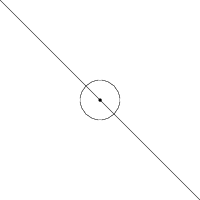

In [7]:
C0 = cycle2D([0, 0]) # the point at the origin
C1 = cycle2D([0, 0], M, 1) # the unit circle, see definition of the matrix M above
C2 = cycle2D(0, [1, 1], 0) # the straight line through the origin an slop -1 
Asy.send(C0.asy_string()) # We send to Asympotote the drawing instruction string for C0
Asy.send(C1.asy_string()) # We send to Asympotote the drawing instruction string for C1
Asy.send(C2.asy_string()) # We send to Asympotote the drawing instruction string for C2
Asy.shipout("first-test") # request to output to a file, which will be vsualised by Jupyter

<a id="vieports"></a>
### Using viewports

On our first graphics, We see the point, the circle and the line. Only the finite portion of the line is painted, it shall fits inside the `viewport`. It is a rectangle, the default lower-left and upper-right corners  are $(-5,-5)$ and $(5,5)$. Only parts of cycles within a used viewport are painted as illustrated here: 

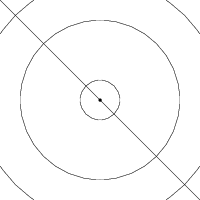

In [8]:
C3 = cycle2D([0, 0], M, 4**2) # the cicrle of the radius 4
C4 = cycle2D([0, 0], M, 6**2) # the cicrle of the radius 4
C5 = cycle2D([0, 0], M, 8**2) # the cicrle of the radius 8
Asy.send(C3.asy_string()) # We send to Asympotote the drawing instruction string for C0
Asy.send(C4.asy_string()) # We send to Asympotote the drawing instruction string for C1
Asy.send(C5.asy_string()) # We send to Asympotote the drawing instruction string for C1
Asy.shipout("second-test") # request to output to a file, which will be vsualised by Jupyter

In addition to the previous picture (which was not erased, see below) we notice the entire circle `C3`, four arcs of the cycle `C3` and no traces of `C5` at all.

The default viewport can be set as follow:

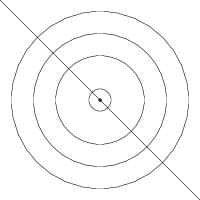

In [9]:
set_viewport(-9,-9,9,9) # Set the larger default viewpoty
Asy.erase() # Erase the picture from the old drawings
Asy.size(200) # Set the picture size
Asy.send(C0.asy_string()) # the drawing instruction string for C0
Asy.send(C1.asy_string()) # drawing instruction string for C1
Asy.send(C2.asy_string()) # drawing instruction string for C2
Asy.send(C3.asy_string()) # drawing instruction string for C3
Asy.send(C4.asy_string()) # drawing instruction string for C4
Asy.send(C5.asy_string()) # drawing instruction string for C5
Asy.shipout("third-test")  # request to output to a file for Jupyter visualisation

Now all cycles are visible in the larger viewport. You do not need to be limited to the default viewport and can set as many of them as possible as illustrated below: 

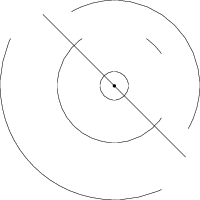

In [10]:
V1 = viewport(-9,-9,3.3,3.3) # Set the first additional viewport
V2 = viewport(-3,-3,9,9) # Set the second additional viewport
Asy.erase() # Erase the picture from the old drawings
Asy.size(200) # Set the picture size
Asy.send(C0.asy_string()) # Use the default viewport implicitly
Asy.send(C1.asy_string(current_viewport)) # Use the default viewport explicitly 
Asy.send(C2.asy_string(current_viewport)) # Use the default viewport explicitly
Asy.send(C3.asy_string(V1)) # C3 in the first viewport
Asy.send(C4.asy_string(V2)) # C4 in the second viewport
Asy.send(C5.asy_string(V1)) # C5 in the first viewport
Asy.shipout("fourth-test")  # request to output to a file for Jupyter visualisation

Also we can add to our drawing a bit of colour and style using `Asymptote` language.

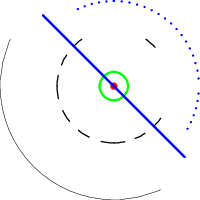

In [11]:
Asy.erase() # Erase the picture from the old drawings
Asy.size(200) # Set the picture size
Asy.send(C0.asy_string(current_viewport, [1,0,0], '7pt')) # RGB colour red and 7pt pen
Asy.send(C1.asy_string(current_viewport, [0,1,0], '2pt')) # GGB colour green and 2ot pen
Asy.send(C2.asy_string(current_viewport, [0,0,1], '2pt')) #  GGB colour blue and 2ot pen
Asy.send(C3.asy_string(V1, [0,0,0], '1.5pt+dashed')) # Black 1.5pt colour and dashed line 
Asy.send(C4.asy_string(V2, [0,0,1], '2pt+dotted')) # Blue 2pt pen dotted line
Asy.send(C5.asy_string(V1)) # C5 in default line style
Asy.shipout("fifth-test")  # request to output to a file for Jupyter visualisation

This gives a sufficient flexibility in visualising cycles, with further possibilities provided by other  `Asymptote` commands.

[Back to ToC](#ToC)

<a id="ell-par-hyp"></a>
## Cycles: circles, parabolas and hyperbolas
We already unified circles and lines in order to produce a Möbius-invariant family of objects. Equivalently, the equation of a circle \eqref{eq1} is particular case of a general quadratic equation  \eqref{eq3}, which includes linear equations for $k=0$ as well.
Next observation is that Möbius transformations are meaningful not only for circles, but for parabolas and hyperbola  as well. Of course, we need to make few adjustments to accommodate all cases in one theory.

From now on we extend equation \eqref{eq3} to
\begin{equation}
    k(u^2-\sigma v^2) - 2 l u - 2 n v + m =0,   \tag{5}\label{eq5}
\end{equation}
where the parameter $\sigma$ takes values $-1$, $0$ and $1$. In particular, $\sigma = -1$ in \eqref{eq5} produces exactly \eqref{eq3}. The three values $\sigma$ are indicators of the following three cases.

Name | Value of $\sigma$ | Number systems $\mathbb{A}$ | Imaginary unit $\iota^2 = \sigma$
--------- | -------------------------- | ----------------------------------------- | ------------- 
elliptic case| $-1$ | [complex numbers](https://en.wikipedia.org/wiki/Complex_number)  $\mathbb{C}$ | $i^2=-1$
parabolic case| $0$ | [dual numbers](https://en.wikipedia.org/wiki/Dual_number) $\mathbb{D}$ | $\varepsilon^2=0$
hyperbolic case | $1$ | [double (or split-complex) numbers](https://en.wikipedia.org/wiki/Split-complex_number) $\mathbb{O}$ | $j^2=1$

In each case the set of numbers is parametrised by $\mathbb{R}^2$, so numbers has the form $u+\iota v$. The respective *metric* is given by the quadratic form:
\begin{equation}
    -u^2+\sigma v^2=\begin{pmatrix}u&v \end{pmatrix}
    \begin{pmatrix}-1&0\\
    0&\sigma\end{pmatrix}
    \begin{pmatrix}u\\
    v\end{pmatrix}.
    \tag{6}\label{eq6}
\end{equation}
The $2\times 2$ matrix on the right-hand side is exactly the matrix we need to define the type of cycles: elliptic, parabolic or hyperbolic. Conceptually we need element of a respective Clifford algebra

In [12]:
sign = realsymbol('s', '\sigma') # symbol to encode geometry
mu=idx(symbol("mu"),1)
nu=idx(symbol("nu"),1)
e=clifford_unit(mu,diag_matrix([sign])) # diagonal matrix to define the metric as in (6)

In [13]:
u = realsymbol('u') # the first coordinate of a point
v = realsymbol('v') # the second coordinate of the point
P = matrix([[u, v]]) # a point on the plane
C = cycle2D(k, [l, n], m, e) # the generic cycle depending on Clifford unit e and sign
Latex(f'${C.passing(P)}$') # the condition of C passing the point [u, v] 

<IPython.core.display.Latex object>

The output is exactly equation \eqref{eq6} (up to the random order of terms).
Möbius transformations are defined uniformly for all number systems as well:
\begin{equation}
    \begin{pmatrix}a&b\\
    c & d\end{pmatrix} : \ u + \iota v \  \mapsto \
    \frac{a(u + \iota v) + b}{c(u + \iota v) + d},
    \tag{7}\label{eq7}
\end{equation}
where $\begin{pmatrix}a&b\\
    c & d\end{pmatrix}$ is an element of $SL_2(\mathbb{R})$ group. That means that all entries are real numbers and $ad-bc=1$.
    
The cornerstone result for the concept of cycle is:
<a id="thm-FSCc-conjugation"></a>
**Theorem.** *In all three cases, Möbius transformations \eqref{eq7} maps the locus of solution of an equation \eqref{eq6} with coefficient $(k, l, n, m)$ to the locus of solution of the similar equations with some other coefficients $(k', l', n', m')$.*

A `MoebInv` proof of this Theorem is presented in [Appendix:](#appendix). We will call the map (depending on $\sigma$)
\begin{equation}
    (k, l, n, m) \mapsto (k', l', n', m')
    \tag{8}\label{eq8}
\end{equation}
from the previous Theorem by *Möbius transformation of cycles*. It is explicit expression can be found in [Appendix:](#appendix) and is not particularly simple. But it is easy to check that the map \eqref{eq8} is linear $\mathbb{R}^4 \rightarrow \mathbb{R}^4$ and thus can be pulled to a map $P\mathbb{R}^3 \rightarrow P\mathbb{R}^3$.

Now we are ready to answer the question from the this notebook's title:

**Definition.** *Cycles are points of the projective space $P\mathbb{R}^3$ with the associated Möbius transformations obtained from map \eqref{eq8} of $4$-vectors $(k, l, n, m)$.*

Although equation \eqref{eq5} was an important steps towards the last definition, we shall not think on cycles as collections of points solving \eqref{eq5}: some cycles had only empty locus of solutions.

To illustrate the concept of cycles we will draw few cycles in their three appearances: elliptic, parabolic and hyperbolic.

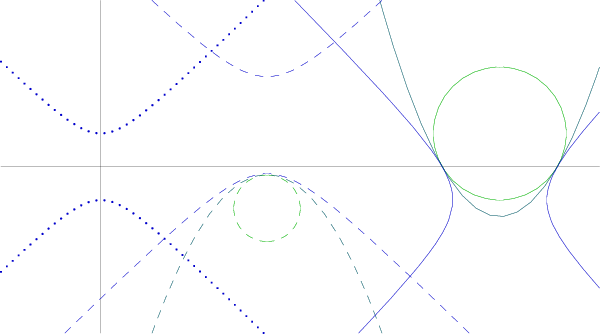

In [14]:
V = viewport(-3, -5, 15, 5)  # Set the larger default viewpoty
Asy.erase() # Erase the picture from the old drawings
Asy.size(600)  # Set the picture size
Asy.draw(cycle2D(0, [0, 1], 0).asy_string(V)) # The real line
Asy.draw(cycle2D(0, [1, 0], 0).asy_string(V)) # The vertical axis

C1 = cycle2D(1, [0, 0], 1, e) # This cycle does not have points in elliptic and parabolic cases
C2 = cycle2D(1, [5, -1.25], 5**2 + 1.25**2 - 1**2, e) # does not intersect the real axis r < |l|
C3 = cycle2D(1, [12, 1], 12**2+1**2-2**2, e) # intersects the real axis r > l
cycles = [C1, C2, C3]
styles = ["2pt + dotted", "1pt+dashed", "1pt"] # styles: C1-dotted, C2-dashed, C3-solid
for s in [-1, 0, 1]: # define elliptic, parabolic or hyperbolic case
    for j in range(3): # chooses a cycle
        Asy.draw(cycle2D(cycles[j].subs(sign == s)).asy_string(V, [0, .7-0.35*(s+1), 0.4*(s+1)],  styles[j]))

Asy.shipout("same-cycles-eph") # Output the drawing

A reader can make several observations on relations between different faces of the same cycle in three geometries.

[Back to ToC](#ToC)

<a id="appendix"></a>
## Appendix: `MoebInv` proof of the Theorem

*Proof.* The statement can be fully demonstrated by symbolic computations in `MoebInv`. First, for a given point $(u,v)$ we build a cycle passing it. This is done by `subject_to()` menthod:

In [15]:
C2=C.subject_to(C.passing(P))
Latex(f'Cycle C2=${C2}$ passes point $P={P}$: {bool(C2.passing(P))}')

<IPython.core.display.Latex object>

Now we define an element of $SL_2(\mathbb{R})$ and construct the conjugation of the cycle `C2` by it

In [16]:
a = realsymbol('a')
b = realsymbol('b')
c = realsymbol('c')
d = realsymbol('d')
C3=C2.sl2_similarity(a, b, c, d, e)
Latex(f'The transformed cycle: C3=${C3}$')

<IPython.core.display.Latex object>

This is the explicit form of the map \eqref{eq8}.

On the other hand we define the Mobius map of the point $P$:

In [17]:
P1=clifford_moebius_map(sl2_clifford(a,b,c,d,e),P,e)
Latex(f'${P1}$')

<IPython.core.display.Latex object>

The two last outputs are cumbersome, fortunately computer can make the final check for us. We only need to suggest that the $SL_2(\mathbb{R})$ substitution $a=(1+bc)/d$ shall be used for simplification.

In [18]:
print('Conjugated cycle C3 passes the Moebius image P1 of P: ' + \
      f'{C3.val(P1).subs([a==(1+b*c)/d]).normal().is_zero()}')

Conjugated cycle C3 passes the Moebius image P1 of P: True


This finishes the proof by a direct calculation.$\Box$

[Back to ToC](#ToC)

### References
<a id="references"></a>

1. Vladimir V. Kisil. *Starting with the group SL2(R).* Notices Amer. Math. Soc., [54(11):1458–1465](http://www.ams.org/notices/200711/tx071101458p.pdf), 2007. [arXiv:math/0607387](https://arxiv.org/abs/math/0607387), Zbl # 1137.22006.

2. Vladimir V. Kisil. *Geometry of Möbius Transformations: Elliptic, Parabolic and Hyperbolic Actions of $SL_2(\mathbb{R})$*. [Imperial College Press](https://www.worldscientific.com/worldscibooks/10.1142/p835), London, 2012. Includes a live DVD.

3.  Vladimir V. Kisil, [*MoebInv notebooks*](https://github.com/vvkisil/MoebInv-notebooks), 2019.

4. I. M. Yaglom. *A Simple Non-Euclidean Geometry and Its Physical Basis.* Heidelberg Science Library. Springer-Verlag, New York, 1979. Translated from the Russian by Abe Shenitzer, with the editorial assistance of Basil Gordon.